In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv(r"order.csv")
# 取后8列数据
t = data.iloc[:, -8:]
# t

In [5]:
class KMeans:
    """使用python语言实现聚类。"""
    
    def __init__(self, k, times):
        """初始化方法。
        
        Parameters
        -----
        k ： int
            聚类的个数
        
        times ： int
            聚类迭代的次数
        """
        
        self.k = k
        self.times = times
        
    def fit(self, X):
        """根据提供的训练数据，对模型进行训练。
        
        Parameters
        ----
        X ： 类数组类型，形状为：【样本数量， 特征数量】
            待训练的样本特征属性。
        """
        
        X = np.asarray(X)
        # 设置随机种子，以便随机的结果可以重现。
        np.random.seed(0)
        # 从数组中随机选择k个点作为聚类中心。
        self.cluster_centers_ = X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))
        
        for t in range (self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离。
                dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
                # 将最小的距离的索引赋值给标签数组。索引的值就是当前所属的簇。范围为【0， k - 1】
                self.labels_[index] = dis.argmin()
            # 循环遍历每一个簇。
            for i in range(self.k):
                # 计算每个簇内所有点的均值，更新聚类中心。
                self.cluster_centers_[i] = np.mean(X[self.labels_ == i], axis=0)
                
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测。（预测样本属于哪一个簇）
        
        Parameters
        -----
        X ： 类数组类型，形状为：【样本数量， 特征数量】
            待训练的样本特征属性。 
        
        Returns
        -----
        result ： 数组类型
            预测结果。每一个X所属的簇。
        """
        
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            # 计算样本到聚类中心的距离。
            dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
            # 找到距离最近的聚类中心，划分类别。
            result[index] = dis.argmin()
        return result

In [6]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [7]:
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [8]:
# 查看某个簇内的索引样本数据。
t [kmeans.labels_ == 0]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.00,0.00,0.00
23,24.10,22.29,38.69,14.92,0.00,0.00,0.00,0.00
24,36.51,31.93,27.18,4.38,0.00,0.00,0.00,0.00
40,22.76,0.00,0.00,77.24,0.00,0.00,0.00,0.00
43,65.64,12.36,21.99,0.00,0.00,0.00,0.00,0.00
49,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,89.37,10.63,0.00,0.00,0.00,0.00,0.00,0.00
61,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
65,47.08,16.59,36.33,0.00,0.00,0.00,0.00,0.00
71,64.64,0.00,0.00,35.36,0.00,0.00,0.00,0.00


In [10]:
kmeans.predict([[30, 30, 40, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 30, 30, 40], [30, 30, 0, 0, 0, 0, 20, 20]])

array([0., 2., 1.])

In [11]:
t2 = data.loc[:, "Food%":"Fresh%"]
kmeans = KMeans(3, 50)
kmeans.fit(t2)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

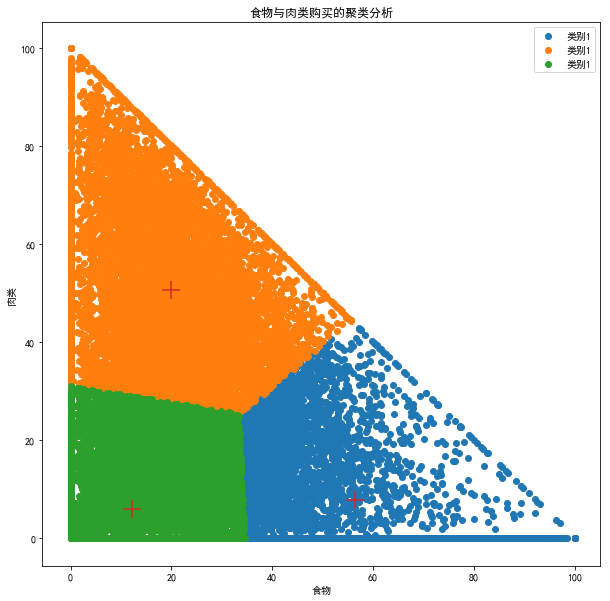

In [14]:
plt.figure(figsize=(10, 10))
# 绘制每个类别的散点图
plt.scatter(t2[kmeans.labels_ == 0].iloc[:, 0], t2[kmeans.labels_ == 0].iloc[:, 1], label="类别1")
plt.scatter(t2[kmeans.labels_ == 1].iloc[:, 0], t2[kmeans.labels_ == 1].iloc[:, 1], label="类别1")
plt.scatter(t2[kmeans.labels_ == 2].iloc[:, 0], t2[kmeans.labels_ == 2].iloc[:, 1], label="类别1")
# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=300)
plt.title("食物与肉类购买的聚类分析")
plt.xlabel("食物")
plt.ylabel("肉类")
plt.legend()
plt.show()